In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import function as func
from scipy import special
import lmfit
import fit_script as fit

In [49]:
"""
start_freq = 26.0   # [GHz]

initial = int(start_freq * 1.e+6 - 250)
final = int(initial + 1.e+5)

for rebin in [100, 300, 500, 1000, 1500, 2000, 3000, 5000, 10000]:
    print(rebin)
    for i in range(initial, final, 2000):
        word = list(str(i))
        word.insert(2, ".")
        start = "".join(word)

        signal = func.csv_to_array("/data/ms2840a/result_data/signal_12_data/start_{}GHz.csv".format(start))
        W = (signal["W_0"] + signal["W_1"] + signal["W_2"] + signal["W_3"] + signal["W_4"] + signal["W_5"] - signal["W_6"] - signal["W_7"] - signal["W_8"] - signal["W_9"] - signal["W_10"] - signal["W_11"])/12 
        freq, W, W_err = func.any_rebin_func(signal["freq"], W, rebin)

        out_path = "/data/ms2840a/result_data/rebin_result/rebin_{}Hz/start_{}GHz.csv".format(rebin, start)
        fit.fitting(out_path, start, start_freq, freq, W)
"""

'\nstart_freq = 26.0   # [GHz]\n\ninitial = int(start_freq * 1.e+6 - 250)\nfinal = int(initial + 1.e+5)\n\nfor rebin in [100, 300, 500, 1000, 1500, 2000, 3000, 5000, 10000]:\n    print(rebin)\n    for i in range(initial, final, 2000):\n        word = list(str(i))\n        word.insert(2, ".")\n        start = "".join(word)\n\n        signal = func.csv_to_array("/data/ms2840a/result_data/signal_12_data/start_{}GHz.csv".format(start))\n        W = (signal["W_0"] + signal["W_1"] + signal["W_2"] + signal["W_3"] + signal["W_4"] + signal["W_5"] - signal["W_6"] - signal["W_7"] - signal["W_8"] - signal["W_9"] - signal["W_10"] - signal["W_11"])/12 \n        freq, W, W_err = func.any_rebin_func(signal["freq"], W, rebin)\n\n        out_path = "/data/ms2840a/result_data/rebin_result/rebin_{}Hz/start_{}GHz.csv".format(rebin, start)\n        fit.fitting(out_path, start, start_freq, freq, W)\n'

In [2]:
result = {
    "18.0": {
        "100": np.array([]), 
        "300": np.array([]), 
        "500": np.array([]), 
        "1000": np.array([]), 
        "1500": np.array([]), 
        "2000": np.array([]), 
        "3000": np.array([]), 
        "5000": np.array([]), 
        "10000": np.array([])
    }, 
    "22.0": {
        "100": np.array([]), 
        "300": np.array([]), 
        "500": np.array([]), 
        "1000": np.array([]), 
        "1500": np.array([]), 
        "2000": np.array([]), 
        "3000": np.array([]), 
        "5000": np.array([]), 
        "10000": np.array([])
    }, 
    "26.0": {
        "100": np.array([]), 
        "300": np.array([]), 
        "500": np.array([]), 
        "1000": np.array([]), 
        "1500": np.array([]), 
        "2000": np.array([]), 
        "3000": np.array([]), 
        "5000": np.array([]), 
        "10000": np.array([])
    }
}

In [26]:
sigma = {"18.0": [], "22.0": [], "26.0": []}
sigma_err = {"18.0": [], "22.0": [], "26.0": []}
mean = {"18.0": [], "22.0": [], "26.0": []}
mean_err = {"18.0": [], "22.0": [], "26.0": []}

In [6]:
start_freq = 26.0   # [GHz]

initial = int(start_freq * 1.e+6 - 250)
final = int(initial + 1.e+5)

for rebin in ["100", "300", "500", "1000", "1500", "2000", "3000", "5000", "10000"]:
    for i in range(initial, final, 2000):
        word = list(str(i))
        word.insert(2, ".")
        start = "".join(word)

        path = "/data/ms2840a/result_data/rebin_result/rebin_{}Hz/start_{}GHz.csv".format(rebin, start)
        data = func.csv_to_array(path)
        result[str(start_freq)][rebin] = np.append(result[str(start_freq)][rebin], data["P"]/data["P_err"])

In [7]:
def gause_model(x, mean, sigma, height):
    return height * np.exp( -1./2. * ((x-mean)/sigma) ** 2.)

def gause_residual(params, x, y, yerr):
    mean = params['mean']
    sigma = params['sigma']
    height = params['height']
    y_model = gause_model(x, mean, sigma, height)
    chi = (y - y_model)/yerr
    a = np.isfinite(chi)
    return chi[a]

In [11]:
def plot_hist(ax, data, rebin):
    n, bins, hatches = ax.hist(data, bins=51, range=(-7.5,7.5), color="white")
    bins_x = np.zeros(len(n))
    for i in range(len(n)):
        bins_x[i] = (bins[i] + bins[i+1]) / 2

    ax.errorbar(bins_x, n, yerr = np.sqrt(n), capsize=0, fmt='x', markersize=6, ecolor='blue', markeredgecolor = "blue", color='blue', label=r"$P_{\rm DP}/\Delta P_{\rm DP}$")

    params = lmfit.Parameters()
    params.add('mean', value=0.)
    params.add('sigma', value=1.)
    params.add('height', value=1.)

    result = lmfit.minimize(gause_residual, params, args=(bins_x, n, np.sqrt(n)))
    height = result.params["height"].value
    mean = result.params["mean"].value
    sigma = np.abs(result.params["sigma"].value)
    mean_err = result.params["mean"].stderr
    sigma_err = result.params["sigma"].stderr
    ax.plot(bins_x, gause_model(bins_x, mean, sigma, height), label="fit result", color="r")
    
    ax.set_title("BW = " + str(rebin/1000) + " kHz")
    ax.set_xlabel("")
    ax.set_ylabel("conuts")
    ax.set_xlabel(r"$P_{\rm DP}/\Delta P_{\rm DP}$")
    ax.legend()

    #ax.text(0.03, 0.8,  "rms = " + str(round(np.std(data), 3)), transform=ax.transAxes)
    ax.text(0.03, 0.9, "mean = " + str(round(mean, 3)) + r" $\pm$ " + str(round(mean_err, 3)), transform=ax.transAxes)
    ax.text(0.03, 0.82,  "sigma = " + str(round(sigma, 3)) + r" $\pm$ " + str(round(sigma_err, 3)), transform=ax.transAxes)

    return round(sigma, 3), round(sigma_err, 3), round(mean, 3), round(mean_err, 3)

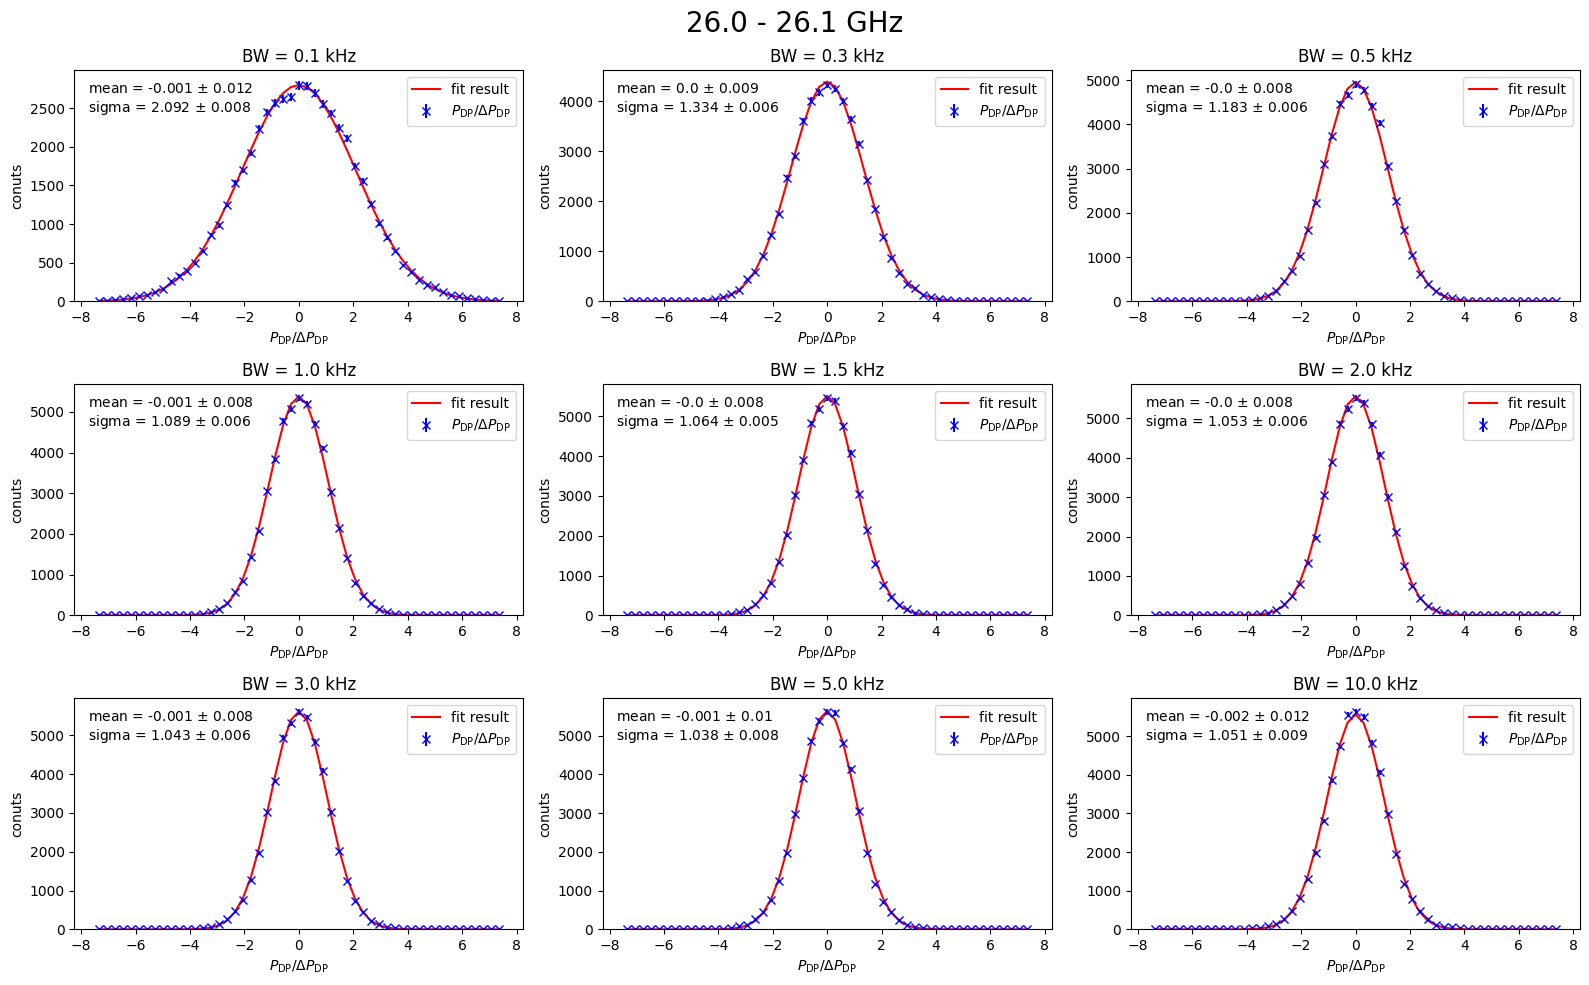

In [29]:
base = 26.0

fig, axes = plt.subplots(3,3,figsize=(16,10))
plt.rcParams.update(plt.rcParamsDefault)
fig.suptitle("{} - {} GHz".format(base, base + 0.1), fontsize=20)

s, se, m, me = plot_hist(axes[0][0], result[str(base)]["100"], 100)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

s, se, m, me = plot_hist(axes[0][1], result[str(base)]["300"], 300)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

s, se, m, me = plot_hist(axes[0][2], result[str(base)]["500"], 500)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)
s, se, m, me = plot_hist(axes[1][0], result[str(base)]["1000"], 1000)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

s, se, m, me = plot_hist(axes[1][1], result[str(base)]["1500"], 1500)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

s, se, m, me = plot_hist(axes[1][2], result[str(base)]["2000"], 2000)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

s, se, m, me = plot_hist(axes[2][0], result[str(base)]["3000"], 3000)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

s, se, m, me = plot_hist(axes[2][1], result[str(base)]["5000"], 5000)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

s, se, m, me = plot_hist(axes[2][2], result[str(base)]["10000"], 10000)
sigma[str(base)].append(s)
sigma_err[str(base)].append(se)
mean[str(base)].append(m)
mean_err[str(base)].append(me)

fig.tight_layout()
plt.savefig("../result_figure/rebin_analysis/{}GHz.pdf".format(str(base)[:2]))

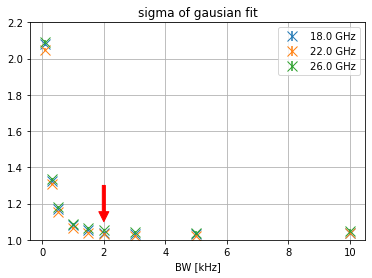

In [12]:
rebin_p = [0.1, 0.3, 0.5, 1, 1.5, 2, 3, 5, 10]
plt.figsize=(16,10)
plt.errorbar(rebin_p, sigma["18.0"], yerr = sigma_err["18.0"], fmt="x", markersize=10, label="18.0 GHz")
plt.errorbar(rebin_p, sigma["22.0"], yerr = sigma_err["22.0"], fmt="x", markersize=10, label="22.0 GHz")
plt.errorbar(rebin_p, sigma["26.0"], yerr = sigma_err["26.0"], fmt="x", markersize=10, label="26.0 GHz")
plt.ylim([1,2.2])
plt.grid()
plt.legend()

plt.annotate('', xy=[2, 1.1], xytext=[2, 1.3],
                arrowprops=dict(shrink=0, width=3, headwidth=10, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='red', edgecolor='red')
               )

#plt.ylabel("sigma")
plt.xlabel("BW [kHz]")
plt.title("sigma of gausian fit")
plt.savefig("../result_figure/rebin_analysis/sigma.pdf")

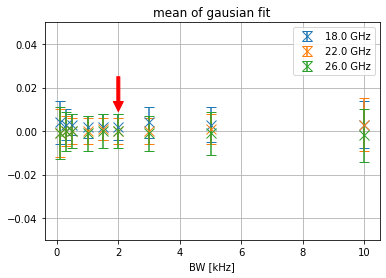

In [15]:
rebin_p = [0.1, 0.3, 0.5, 1, 1.5, 2, 3, 5, 10]
plt.figsize=(18,10)
plt.errorbar(rebin_p, mean["18.0"], yerr = mean_err["18.0"], fmt="x", markersize=10, capsize=5, label="18.0 GHz")
plt.errorbar(rebin_p, mean["22.0"], yerr = mean_err["22.0"], fmt="x", markersize=10, capsize=5, label="22.0 GHz")
plt.errorbar(rebin_p, mean["26.0"], yerr = mean_err["26.0"], fmt="x", markersize=10, capsize=5, label="26.0 GHz")
plt.ylim([-0.02, 0.02])
plt.grid()
plt.legend()

plt.annotate('', xy=[2, 0.009], xytext=[2, 0.025],
                arrowprops=dict(shrink=0, width=3, headwidth=10, 
                                headlength=10, connectionstyle='arc3',
                                facecolor='red', edgecolor='red')
               )

plt.ylim([-0.05, 0.05])
plt.xlabel("BW [kHz]")
plt.title("mean of gausian fit")
plt.savefig("../result_figure/rebin_analysis/mean.pdf")

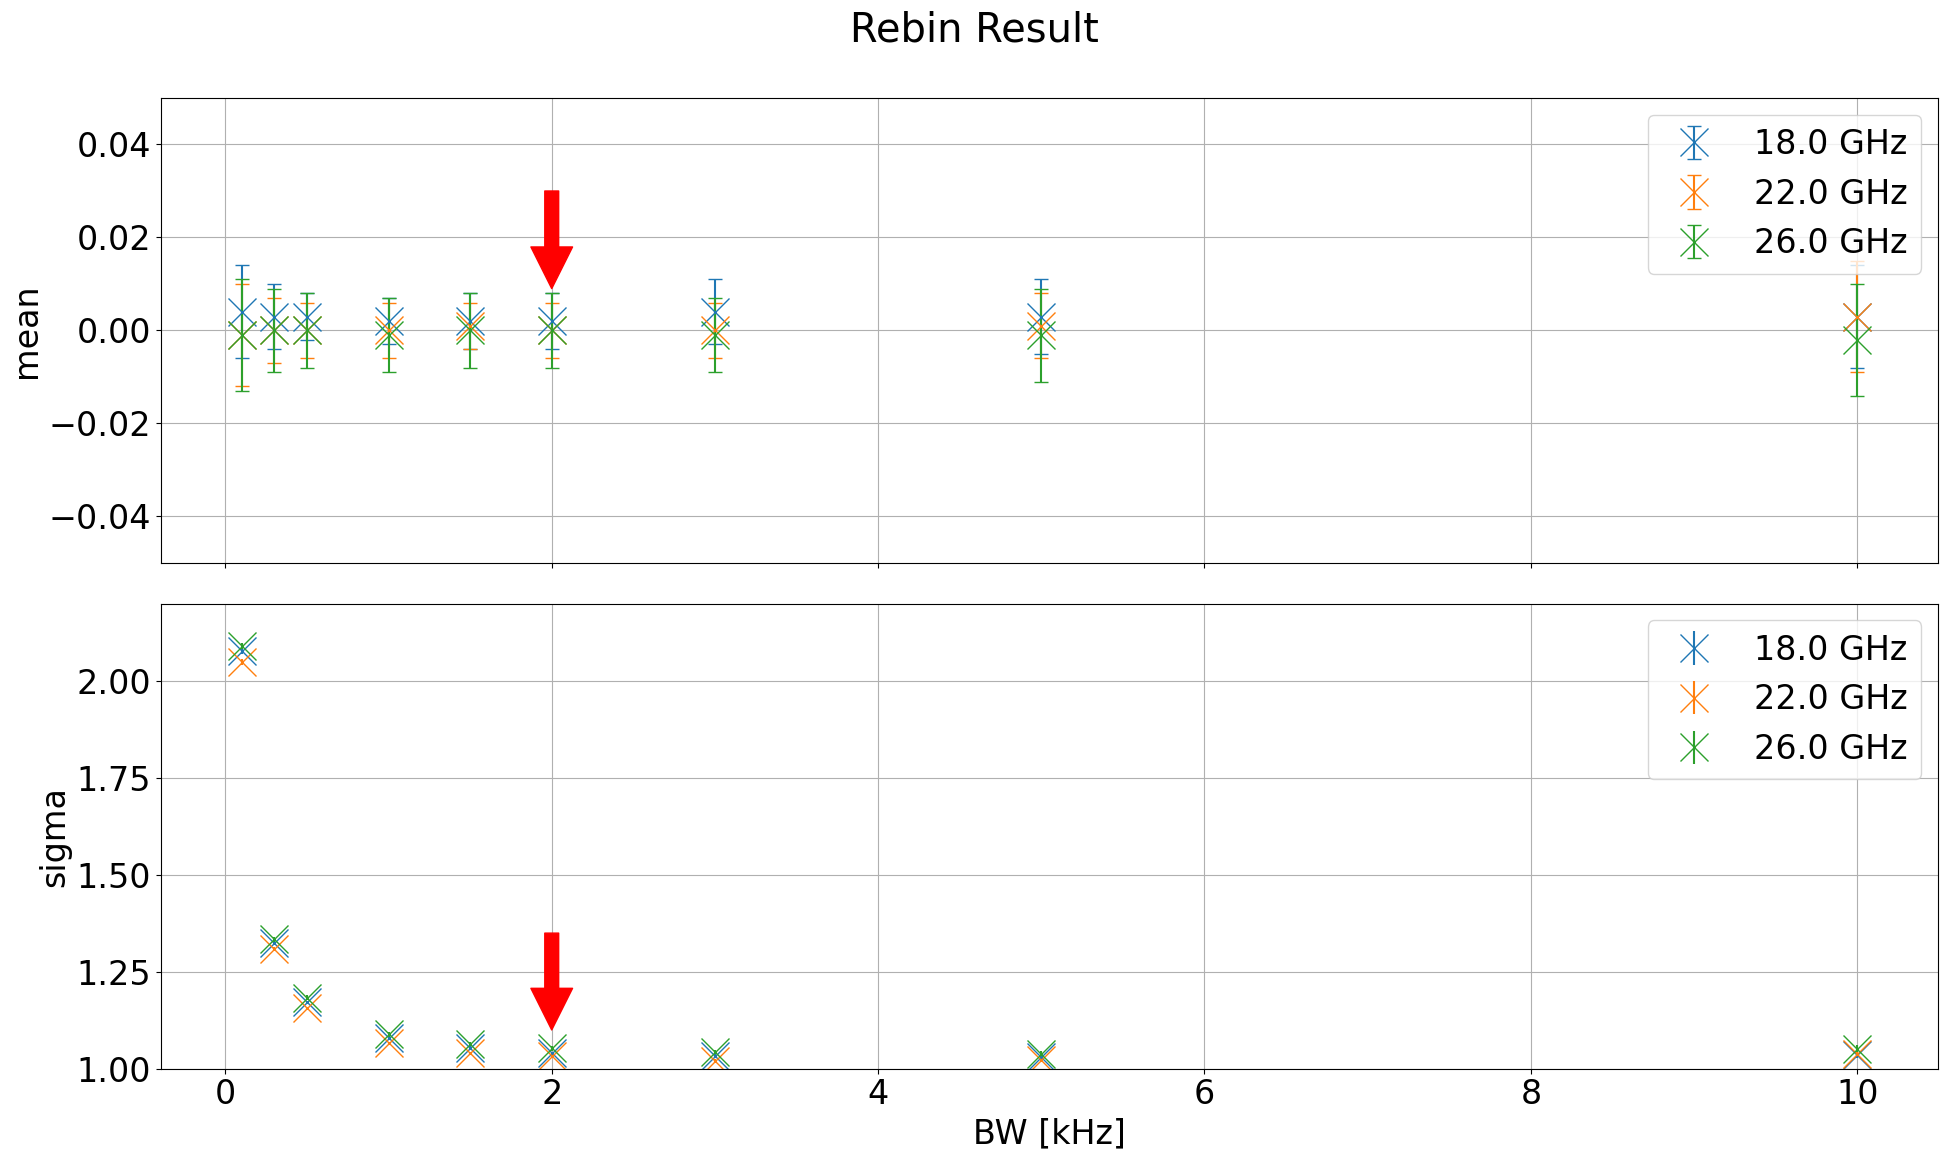

In [51]:
rebin_p = [0.1, 0.3, 0.5, 1, 1.5, 2, 3, 5, 10]
plt.rcParams["font.size"] = 24
fig, axes = plt.subplots(2,1,figsize=(20,12), squeeze=False, sharex=True)
fig.suptitle("Rebin Result")

ax = axes[0][0]
ax.errorbar(rebin_p, mean["18.0"], yerr = mean_err["18.0"], fmt="x", markersize=20, capsize=5, label="18.0 GHz")
ax.errorbar(rebin_p, mean["22.0"], yerr = mean_err["22.0"], fmt="x", markersize=20, capsize=5, label="22.0 GHz")
ax.errorbar(rebin_p, mean["26.0"], yerr = mean_err["26.0"], fmt="x", markersize=20, capsize=5, label="26.0 GHz")
ax.set_ylim([-0.02, 0.02])
ax.grid()
ax.legend(loc="upper right")

ax.annotate('', xy=[2, 0.009], xytext=[2, 0.03],
                arrowprops=dict(shrink=0, width=10, headwidth=30, 
                                headlength=30, connectionstyle='arc3',
                                facecolor='red', edgecolor='red')
               )

ax.set_ylim([-0.05, 0.05])
#ax.set_xlabel("BW [kHz]")
ax.set_ylabel("mean")
#ax.set_title("mean of gausian fit")


ax = axes[1][0]
ax.errorbar(rebin_p, sigma["18.0"], yerr = sigma_err["18.0"], fmt="x", markersize=20, label="18.0 GHz")
ax.errorbar(rebin_p, sigma["22.0"], yerr = sigma_err["22.0"], fmt="x", markersize=20, label="22.0 GHz")
ax.errorbar(rebin_p, sigma["26.0"], yerr = sigma_err["26.0"], fmt="x", markersize=20, label="26.0 GHz")
ax.set_ylim([1,2.2])
ax.grid()
ax.legend(loc="upper right")

ax.annotate('', xy=[2, 1.1], xytext=[2, 1.35],
                arrowprops=dict(shrink=0, width=10, headwidth=30, 
                                headlength=30, connectionstyle='arc3',
                                facecolor='red', edgecolor='red')
               )

ax.set_ylabel("sigma")
ax.set_xlabel("BW [kHz]")
#ax.set_title("sigma of gausian fit")
                    
fig.tight_layout()

plt.savefig("../result_figure/rebin_analysis/mean_sigma.pdf")